# Capstone Regression Project
by: Rio Kinslow


## Business Understanding

Building a Multi-Variate Linear Regression Model using King County,WA House Prices Dataset

For this multiple linear regression project I will be using the kc_house_data.csv dataset. I will obtain the data using the pandas package and retrieve valuable information pertaining to the dataset using its associated modules. I will then scrub the dataset, going column per column, and inspecting for null values and dropping unnecessary columns that we won't be using in our linear regression. There will be some renaming of columns and also creation of dummies that will aid  in the process. The columns with a vast number of null values will be filled in with the median, whereas the columns with not many null values will be filled with 0's. During the exploration phase of this project, we will be creating visualizations using the matplotlib library and also seaborn. I will be creating barplots, scatterplots, bargraph and matrices. These visualizations will help us derive particular features that may be of interest to us as we move along. The trends and correlations we observe will help drive our linear regression moving forward.




## Data Understanding

After completing this initial phase of the project, I  will dive right into the moduling phase of the project which encompasses building boxplots to deal with outliers. But, first I will need to deal with the categorical and continuous features for my model  I  will be using. For the categorical features I want, I  will be using dummy datasets, whereas for the continuous features, I  will then perform the linear regression looking at valuable information such as the r^2 score, & significant  coefficient value ,as well as the average predicted price and the average actual price for that particular model. I will conduct two models. For each, I will also going to test for model accuracy and looking at the significant features we used in the model that were below a p-value of 0.05.

## Data Preparation

### Loading the Data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
sns.set(style='dark')
plt.style.use('seaborn')

In [2]:
# loading in dataset and displaying head and tail of dataset

df = pd.read_csv('./data/kc_house_data.csv')
display(df.head())
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908
30154,9557800100,4/29/2022,500000.0,3,1.5,1200,11058,1.0,NO,NO,...,PUBLIC,1200,0,420,0,1965,0,"18615 7th Avenue South, Burien, Washington 981...",47.435840,-122.32634


## Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4]:
# shape of the dataset

df.shape

(30155, 25)

In [5]:
# columns of the dataset as a list

df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [6]:
# description of the dataset

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


### Data Cleaning

In [8]:
df.drop(labels='id' , axis=1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [9]:
df = df.drop(labels='id' , axis=1)

In [10]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
greenbelt         object
nuisance          object
view              object
condition         object
grade             object
heat_source       object
sewer_system      object
sqft_above         int64
sqft_basement      int64
sqft_garage        int64
sqft_patio         int64
yr_built           int64
yr_renovated       int64
address           object
lat              float64
long             float64
dtype: object

In [11]:
df['sale_yr'] = df.date.map(lambda x: '{}'.format(x[-4:]))
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,sale_yr
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,2022
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,2021
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,2021
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,2021
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,2021


In [12]:
df['sale_yr'] = df['sale_yr'].astype('int')

In [13]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
greenbelt         object
nuisance          object
view              object
condition         object
grade             object
heat_source       object
sewer_system      object
sqft_above         int64
sqft_basement      int64
sqft_garage        int64
sqft_patio         int64
yr_built           int64
yr_renovated       int64
address           object
lat              float64
long             float64
sale_yr            int64
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30155 non-null  object 
 1   price          30155 non-null  float64
 2   bedrooms       30155 non-null  int64  
 3   bathrooms      30155 non-null  float64
 4   sqft_living    30155 non-null  int64  
 5   sqft_lot       30155 non-null  int64  
 6   floors         30155 non-null  float64
 7   waterfront     30155 non-null  object 
 8   greenbelt      30155 non-null  object 
 9   nuisance       30155 non-null  object 
 10  view           30155 non-null  object 
 11  condition      30155 non-null  object 
 12  grade          30155 non-null  object 
 13  heat_source    30123 non-null  object 
 14  sewer_system   30141 non-null  object 
 15  sqft_above     30155 non-null  int64  
 16  sqft_basement  30155 non-null  int64  
 17  sqft_garage    30155 non-null  int64  
 18  sqft_p

In [15]:
df['yr_old'] = np.where(df['yr_renovated'] != 0,df['sale_yr'].apply(lambda x: x) - df['yr_renovated'],
                          df['sale_yr'].apply(lambda x: x) - df['yr_built']) 

In [16]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,sale_yr,yr_old
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,2022,53
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,2021,71
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,2021,65
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,2021,11
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,2021,9


Adding  the  Zipcodes that is in the range of King County

In [17]:
df.address[0:5]

0    2102 Southeast 21st Court, Renton, Washington ...
1    11231 Greenwood Avenue North, Seattle, Washing...
2    8504 South 113th Street, Seattle, Washington 9...
3    4079 Letitia Avenue South, Seattle, Washington...
4    2193 Northwest Talus Drive, Issaquah, Washingt...
Name: address, dtype: object

In [18]:
#zipcodes started at 98.....
# it looks like every column has the same format and ending...
# when working with strings, keep in mind that if the strings are not of equal length
df.address[1000][-20:-15]

'98019'

In [19]:
df.address[0].split(',')

['2102 Southeast 21st Court', ' Renton', ' Washington 98055', ' United States']

In [20]:
df.address[0].split(',')[2][-5:]

'98055'

In [21]:
df['zipcode'] = df.address.apply(lambda x: x[-20:-15])

In [22]:
df['zipcode'].value_counts()

98042    992
98038    858
98115    761
98103    761
98117    748
        ... 
62204      1
68862      1
85207      1
99202      1
34470      1
Name: zipcode, Length: 399, dtype: int64

In [23]:
df['zipcode'] = df['zipcode'].astype(str)

In [24]:
Zip_list = ['98042', '98038', '98103', '98115', '98117', '98023', '98133', '98058',
       '98034', '98001', '98092', '98118', '98106', '98059', '98031', '98033',
       '98052', '98056', '98155', '98125', '98022', '98107', '98126', '98146',
       '98144', '98122', '98045', '98003', '98198', '98006']

In [25]:
Filtered_df = df[df['zipcode'].isin(Zip_list)]

In [26]:
Filtered_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,sale_yr,yr_old,zipcode
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.355910,2021,71,98133
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.290200,2021,11,98118
5,7/20/2021,625000.0,2,1.0,1190,5688,1.0,NO,NO,YES,...,300,0,1948,0,"1602 North 185th Street, Shoreline, Washington...",47.763470,-122.340155,2021,73,98133
8,3/17/2022,780000.0,4,2.5,2340,8125,2.0,NO,NO,NO,...,440,70,1989,0,"2721 Southwest 343rd Place, Federal Way, Washi...",47.293770,-122.369320,2022,33,98023
10,6/1/2022,1025000.0,3,1.5,2570,6379,1.5,NO,NO,YES,...,0,250,1912,0,"3408 Beacon Avenue South, Seattle, Washington ...",47.572760,-122.308200,2022,110,98144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30145,12/27/2021,705000.0,3,2.5,2260,50965,2.0,NO,NO,NO,...,480,200,1998,0,"46533 Southeast 156th Place, North Bend, Washi...",47.457410,-121.719630,2021,23,98045
30147,2/28/2022,665000.0,3,2.5,2100,7210,2.0,NO,NO,NO,...,440,40,1979,0,"5218 South 302nd Place, Auburn, Washington 980...",47.331160,-122.268565,2022,43,98001
30149,10/7/2021,719000.0,3,2.5,1270,1141,2.0,NO,NO,NO,...,200,60,2007,0,"8359 11th Avenue Northwest, Seattle, Washingto...",47.690440,-122.370620,2021,14,98117
30150,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.329400,2021,100,98103


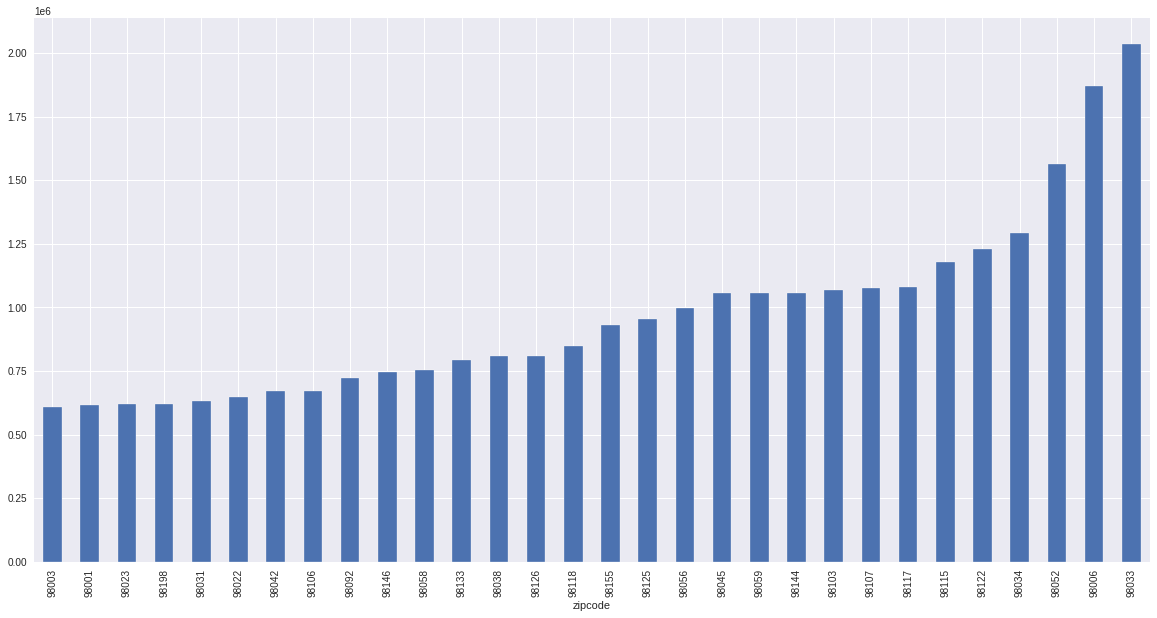

In [27]:
plt.figure(figsize=(20,10))
zip_graph =Filtered_df.groupby(Filtered_df.zipcode).price.mean().sort_values(ascending=True)
zip_graph.plot(kind='bar');

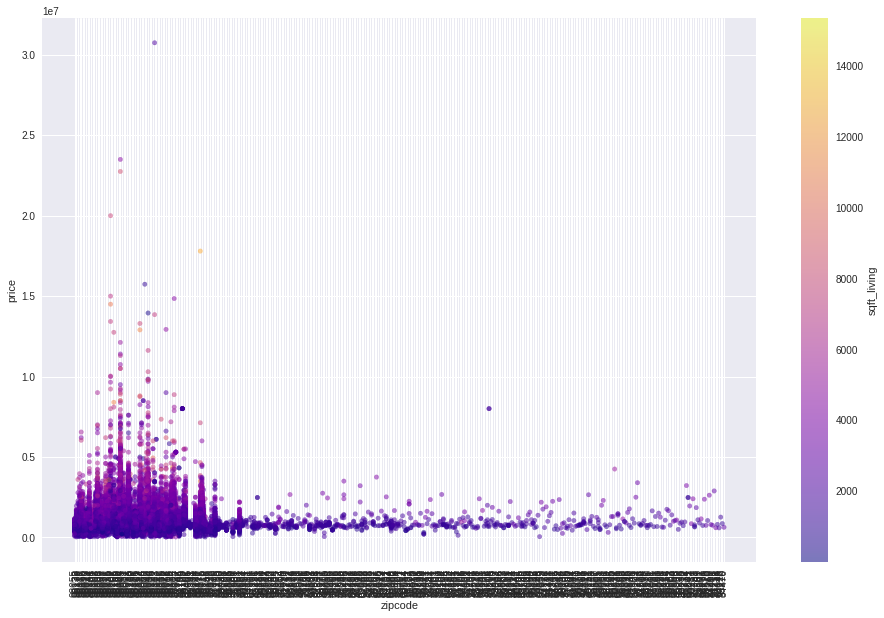

In [28]:
# plotting the sqft_living and zipcode  and coding it according to price 

df.plot(kind='scatter', x='zipcode', y='price',
        alpha=.5, figsize=(16,10), c='sqft_living', cmap='plasma', sharey=True, sharex=False);

plt.xticks(rotation =90);

Note: House prices are clustered according to zipcode. Many factors and variables, tied into the zipcode, may influence the price either positively or negatively and we must be mindful of that.

## Dropping missing values

In [29]:
# remove missing values in these columns, make change permanent using `inplace=True`
df.dropna(subset=['heat_source','sewer_system'], axis=0, inplace=True)

In [30]:
df.isna().sum()/df.shape[0]

date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
greenbelt        0.0
nuisance         0.0
view             0.0
condition        0.0
grade            0.0
heat_source      0.0
sewer_system     0.0
sqft_above       0.0
sqft_basement    0.0
sqft_garage      0.0
sqft_patio       0.0
yr_built         0.0
yr_renovated     0.0
address          0.0
lat              0.0
long             0.0
sale_yr          0.0
yr_old           0.0
zipcode          0.0
dtype: float64

In [31]:
# quantity of null values for each column

df.isnull().sum().sort_values(ascending=False)

date             0
sewer_system     0
yr_old           0
sale_yr          0
long             0
lat              0
address          0
yr_renovated     0
yr_built         0
sqft_patio       0
sqft_garage      0
sqft_basement    0
sqft_above       0
heat_source      0
price            0
grade            0
condition        0
view             0
nuisance         0
greenbelt        0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
zipcode          0
dtype: int64

In [32]:
# unique values for sqft_basement column

df.sqft_basement.unique()

array([   0, 1570, 1580, 1070,  550, 1560, 1100, 1310,  430,  660,  700,
        810,  860, 1250, 1220,  340, 1040, 1650, 2030,  930, 1030,  940,
       1400,  680,  300, 1230,  190,  830,  640, 1150,  990, 1740, 1810,
       1170, 1630, 1060,  470,  950,  500,  650,  780,  380,  530, 1240,
       1110, 2960, 1020,  600, 1380,  460, 1610, 1010, 1440,  670, 1500,
       1120,  750,  160,  390, 1280, 1530, 1090,  560,  720, 1200,  980,
        440,  630, 1360,  800,  610, 2070, 1450,  870,  250,  260,  320,
       1290,  740, 1340, 1300,  580,  730,  770,  900,  880,  400, 1410,
       1140,  669,  570,  710, 2590, 3140,  590, 1080, 1480, 1600,  920,
       1270,  840,  790,  850, 1330, 1430,  220,  410, 1180,  910,  382,
       2060, 1160, 1640,  450,  760,  420,  290, 2830, 1210,  960,  520,
        330,  350,  620,  310, 1460,  820, 1130, 1596,  510, 1510, 1490,
       2620,  480, 1550, 1800, 1390, 1000, 1370, 2460, 5350, 1690, 1870,
       1050,   80,  970,  690, 2740,  270, 1470, 19

In [33]:
# remove missing values in these columns, make change permanent using 'inplace=True'
df.dropna(subset=['heat_source','sewer_system'], axis=0, inplace=True)

In [34]:
#check percentage of missing data in columns 
# sum of na values for each column, they should all be 0
df.isna().sum()/df.shape[0]

date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
greenbelt        0.0
nuisance         0.0
view             0.0
condition        0.0
grade            0.0
heat_source      0.0
sewer_system     0.0
sqft_above       0.0
sqft_basement    0.0
sqft_garage      0.0
sqft_patio       0.0
yr_built         0.0
yr_renovated     0.0
address          0.0
lat              0.0
long             0.0
sale_yr          0.0
yr_old           0.0
zipcode          0.0
dtype: float64

In [35]:
df.shape

(30111, 27)

## Exploring Data

In [36]:
# displaying head and tail of final dataset 

display(df.head())
display(df.tail())

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,sale_yr,yr_old,zipcode
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,2022,53,98055
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,2021,71,98133
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,2021,65,98178
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,2021,11,98118
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,2021,9,98027


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,sale_yr,yr_old,zipcode
30150,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,2021,100,98103
30151,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,2021,10,98116
30152,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,2022,27,98122
30153,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,...,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,2022,16,98055
30154,4/29/2022,500000.0,3,1.5,1200,11058,1.0,NO,NO,NO,...,420,0,1965,0,"18615 7th Avenue South, Burien, Washington 981...",47.435840,-122.32634,2022,57,98148


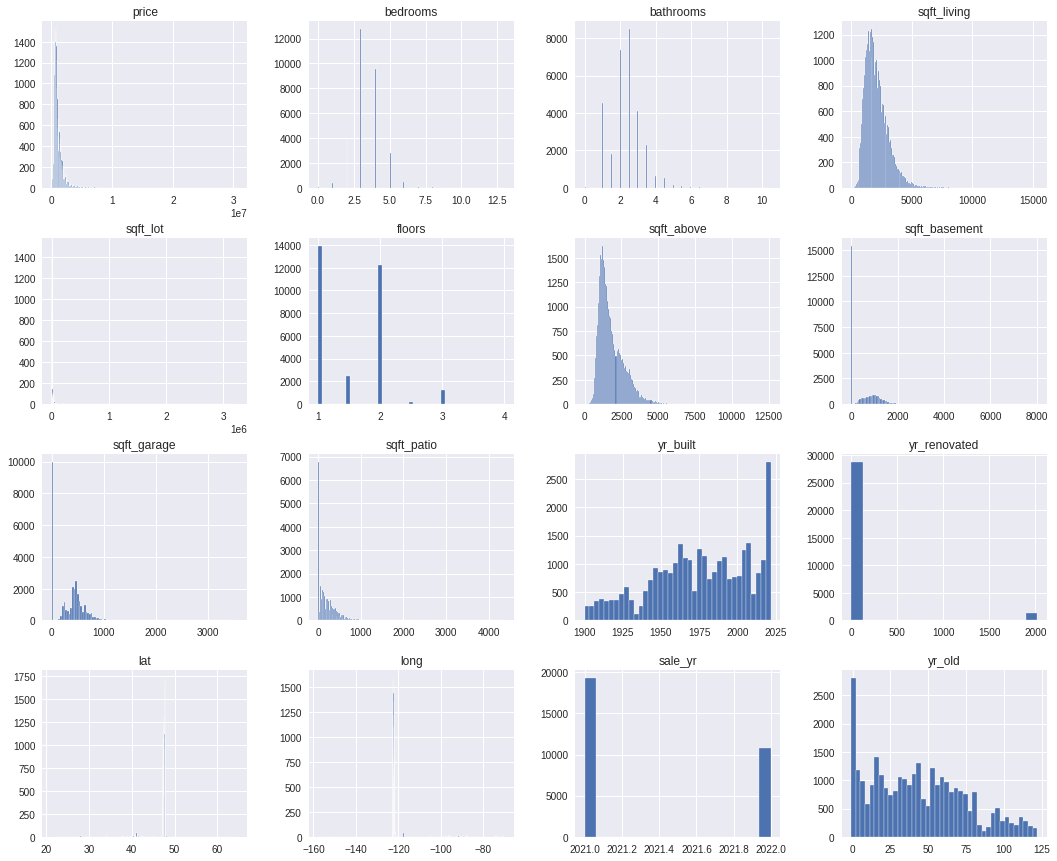

In [37]:
# histograms across all columns

df.hist(figsize=(18,15), bins='auto');

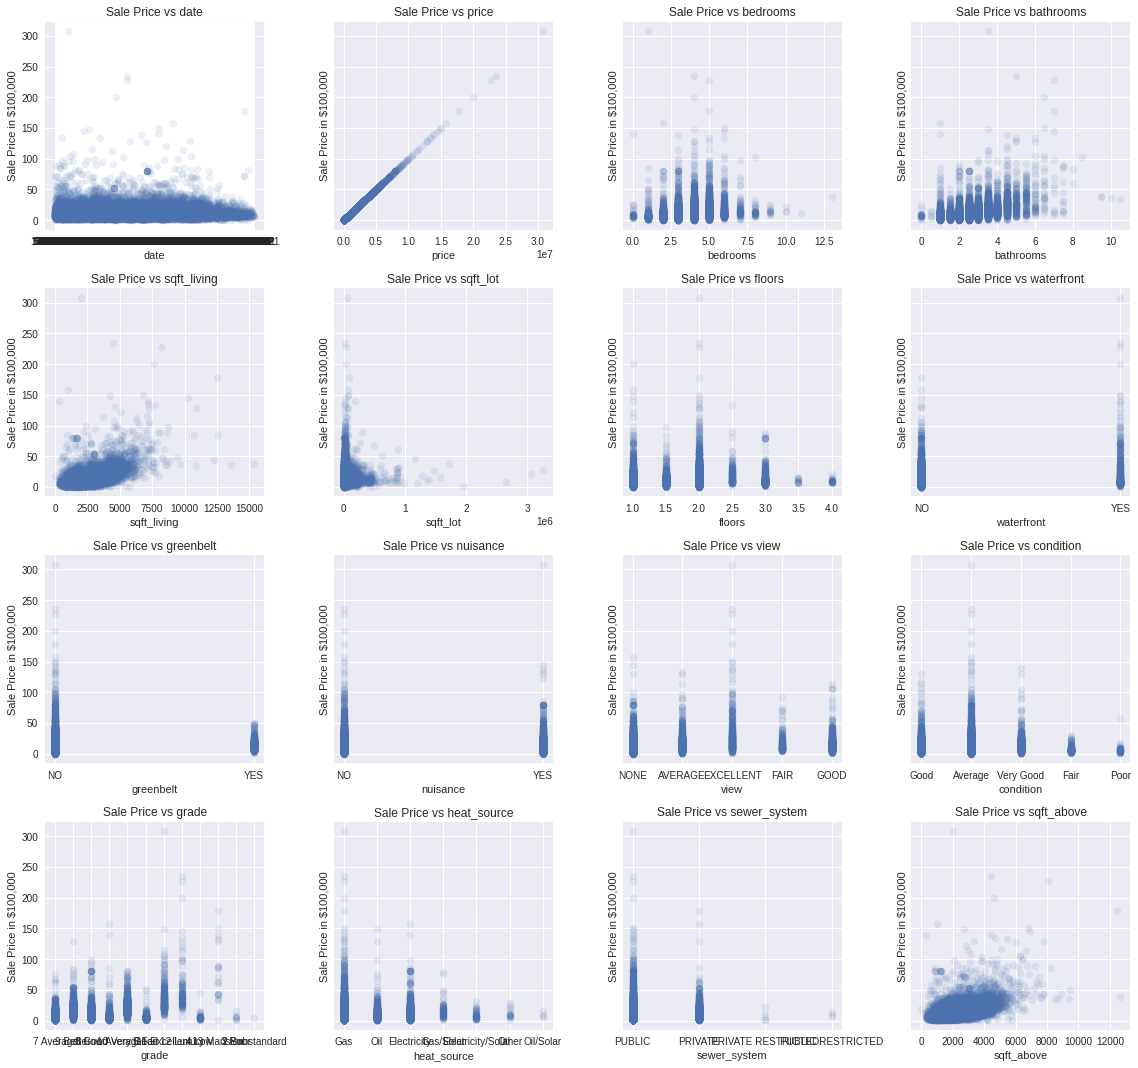

In [38]:
# scatterplots across all columns

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()

Scatter Matrix:

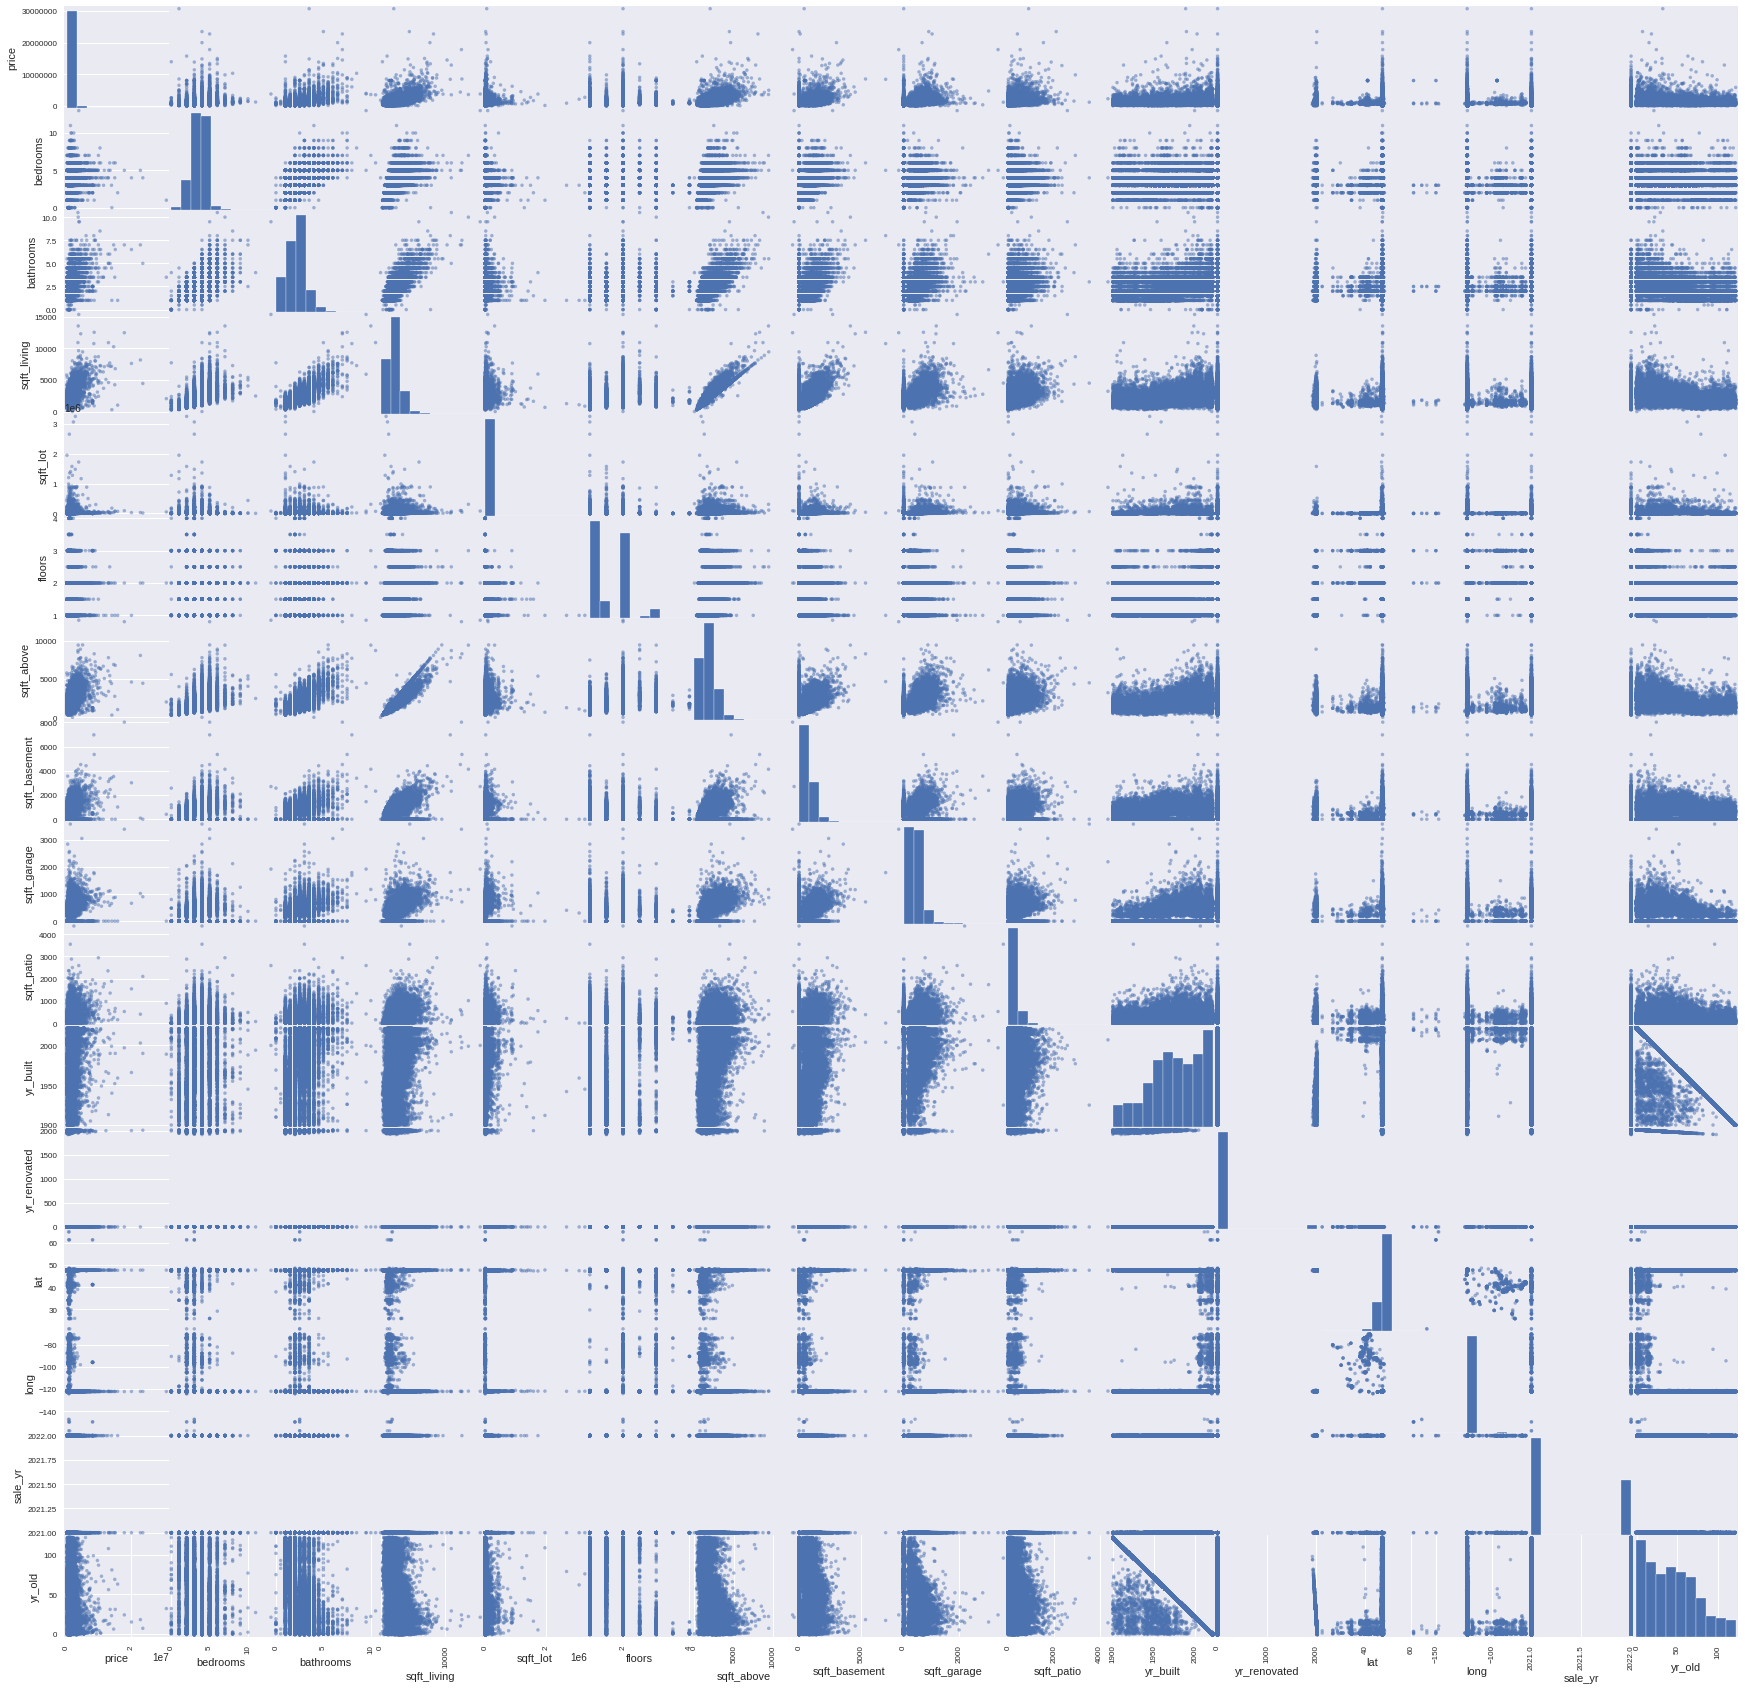

In [39]:
# scatter matrix plotting every feature against each other 

pd.plotting.scatter_matrix(df, figsize = [30,30]);
plt.show()

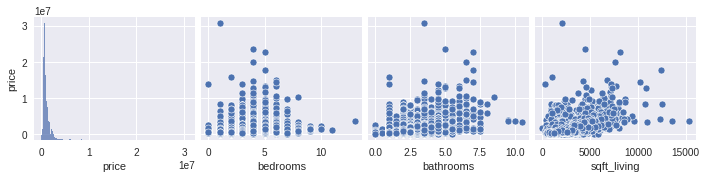

In [40]:
# pairplot of certain features from the dataset vs. price 

sns.pairplot(data=df, x_vars=['price','bedrooms','bathrooms','sqft_living'], y_vars=['price']);

### Exploring Main Columns

In [41]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address',
       'lat', 'long', 'sale_yr', 'yr_old', 'zipcode'],
      dtype='object')

In [42]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,sale_yr,yr_old,zipcode
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,2022,53,98055
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,2021,71,98133
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,2021,65,98178
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,2021,11,98118
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,2021,9,98027


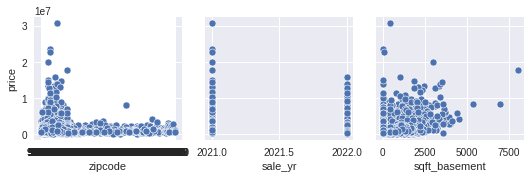

In [43]:
# pairplot of certain features from the dataset vs. price

sns.pairplot(data=df, x_vars=['zipcode','sale_yr','sqft_basement'], y_vars=['price']);

 Bedrooms column

In [44]:
# value counts for bedrooms in sorting them in descending order 

df.bedrooms.value_counts().sort_values(ascending=False)

3     12746
4      9591
2      3925
5      2794
6       498
1       381
7        80
0        39
8        38
9        14
10        3
11        1
13        1
Name: bedrooms, dtype: int64

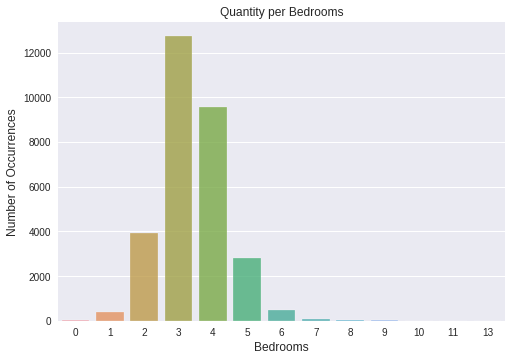

In [45]:
# barplot of bedrooms vs. number of occurrences 

bedrooms  = df['bedrooms'].value_counts()
sns.barplot(bedrooms.index, bedrooms.values, alpha=0.8)
plt.title('Quantity per Bedrooms')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Bedrooms', fontsize=12)
plt.show()

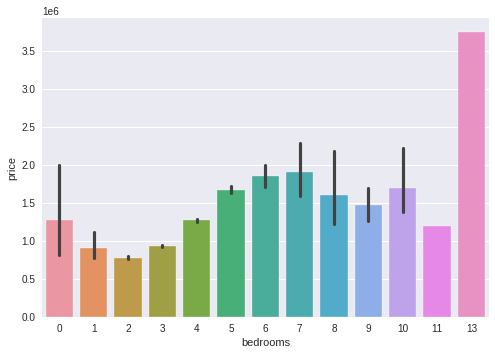

In [46]:
# barplot of bedrooms vs. price 

sns.barplot(x="bedrooms", y="price", data=df);

Grade Column

In [47]:
# value counts for grades and sorting them in descending order 

df.grade.value_counts().sort_values(ascending=False)

7 Average        11693
8 Good            9400
9 Better          3804
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

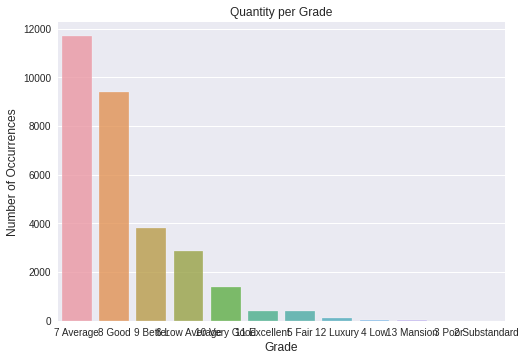

In [48]:
# bar graph of grade vs. number of occurrences 

grades  = df['grade'].value_counts()
sns.barplot(grades.index, grades.values, alpha=0.8)
plt.title('Quantity per Grade')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Grade', fontsize=12)
plt.show()

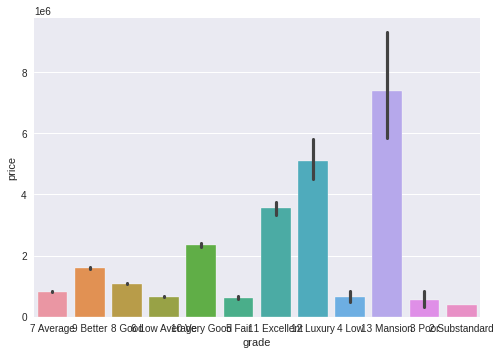

In [49]:
# barplot of grade vs. price 

sns.barplot(x="grade", y="price", data=df);

 Bathrooms column

In [50]:
# value counts for bathrooms and sorting them in descending order 

df.bathrooms.value_counts().sort_values(ascending=False)

2.5     8471
2.0     7343
1.0     4556
3.0     4116
3.5     2264
1.5     1807
4.0      645
4.5      531
5.0      145
5.5      102
6.0       45
6.5       25
0.0       25
7.0       12
7.5       12
0.5        5
9.5        2
8.0        2
10.5       1
10.0       1
8.5        1
Name: bathrooms, dtype: int64

In [51]:
# value counts for floors and sorting them in descending order 

df.floors.value_counts().sort_values(ascending=False)

1.0    13943
2.0    12246
1.5     2434
3.0     1221
2.5      222
4.0       30
3.5       15
Name: floors, dtype: int64

Sale_Yr column:

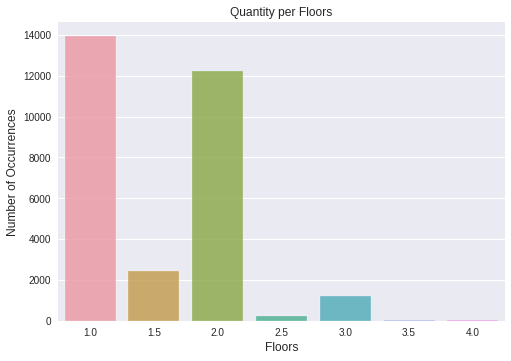

In [52]:
# barplot of floors vs. number of occurrences 

floors  = df['floors'].value_counts()
sns.barplot(floors.index, floors.values, alpha=0.8)
plt.title('Quantity per Floors')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Floors', fontsize=12)
plt.show()

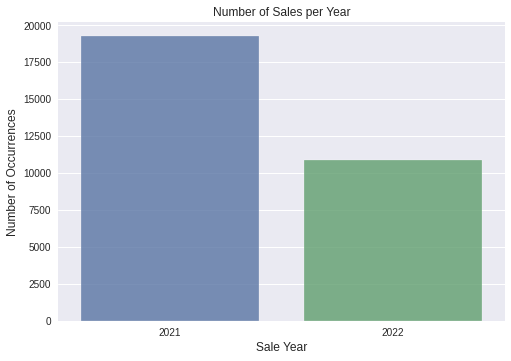

In [53]:
# barplot of sale_yr vs. number of occurrences 

sale_yr  = df['sale_yr'].value_counts()
sns.barplot(sale_yr.index, sale_yr.values, alpha=0.8)
plt.title('Number of Sales per Year')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Sale Year', fontsize=12)
plt.show()

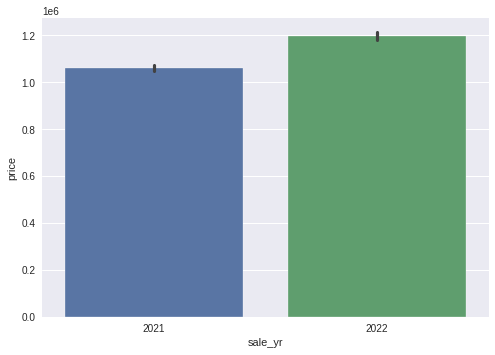

In [54]:
# barplot of sale_yr vs. price

sns.barplot(x="sale_yr", y="price", data=df);

Sale Year Column:

In [55]:
# value counts of sale_yr column and sorting them in descending order 

df.sale_yr.value_counts().sort_values(ascending=False)

2021    19261
2022    10850
Name: sale_yr, dtype: int64

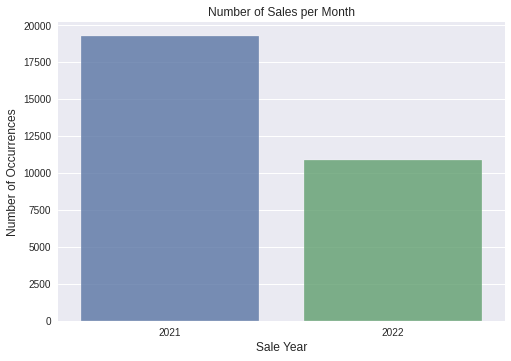

In [56]:
# barplot of sale_month vs. number of occurrences 

sale_month  = df['sale_yr'].value_counts()
sns.barplot(sale_month.index, sale_month.values, alpha=0.8)
plt.title('Number of Sales per Month')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Sale Year', fontsize=12)
plt.show()

### Correlation Visualizations

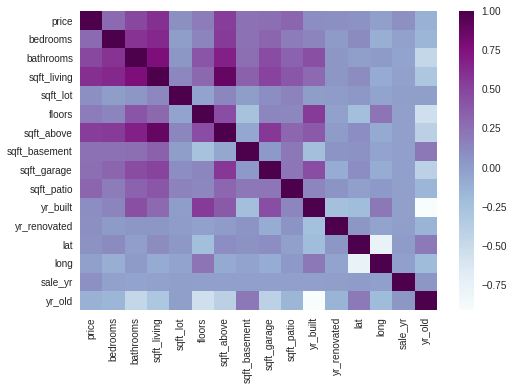

In [57]:
# correlational heatmap comparing all features of the dataset

sns.heatmap(df.corr(), cmap="BuPu");

In [58]:
# correlational values comparing all features
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,sale_yr,yr_old
price,1.000000,0.288954,0.480337,0.608616,0.086550,0.180589,0.538631,0.245005,0.263674,0.313789,0.095796,0.085023,0.063430,-0.022278,0.073904,-0.126909
bedrooms,0.288954,1.000000,0.588035,0.637048,0.006215,0.146871,0.546221,0.237957,0.318110,0.183660,0.145497,0.015369,0.108883,-0.106791,-0.027387,-0.156650
bathrooms,0.480337,0.588035,1.000000,0.772226,0.038028,0.404291,0.674239,0.260684,0.456264,0.327982,0.443379,0.041574,-0.005481,0.017684,-0.042125,-0.471854
sqft_living,0.608616,0.637048,0.772226,1.000000,0.122271,0.303911,0.883733,0.338387,0.510967,0.396530,0.291242,0.039089,0.102205,-0.087625,-0.029198,-0.312269
sqft_lot,0.086550,0.006215,0.038028,0.122271,1.000000,-0.031555,0.131756,0.004457,0.089318,0.154575,0.001897,0.009390,0.030041,-0.034408,-0.004733,-0.003427
floors,0.180589,0.146871,0.404291,0.303911,-0.031555,1.000000,0.448245,-0.248466,0.132363,0.125016,0.544314,-0.025041,-0.218174,0.233589,-0.017305,-0.552862
sqft_above,0.538631,0.546221,0.674239,0.883733,0.131756,0.448245,1.000000,-0.067306,0.559972,0.312593,0.387253,0.011036,0.092317,-0.082722,-0.023131,-0.397502
sqft_basement,0.245005,0.237957,0.260684,0.338387,0.004457,-0.248466,-0.067306,1.000000,0.025766,0.210305,-0.230783,0.054032,0.059664,-0.045104,-0.009571,0.211054
sqft_garage,0.263674,0.318110,0.456264,0.510967,0.089318,0.132363,0.559972,0.025766,1.000000,0.216512,0.447720,-0.098301,0.092092,-0.096639,-0.012821,-0.409075
sqft_patio,0.313789,0.183660,0.327982,0.396530,0.154575,0.125016,0.312593,0.210305,0.216512,1.000000,0.138112,0.056183,-0.019666,0.025675,-0.016531,-0.157426


In [59]:
# correlational map with levels of precision

corr = df.corr()
corr.style.background_gradient(cmap='viridis').set_precision(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,sale_yr,yr_old
price,1.000,0.289,0.480,0.609,0.087,0.181,0.539,0.245,0.264,0.314,0.096,0.085,0.063,-0.022,0.074,-0.127
bedrooms,0.289,1.000,0.588,0.637,0.006,0.147,0.546,0.238,0.318,0.184,0.145,0.015,0.109,-0.107,-0.027,-0.157
bathrooms,0.480,0.588,1.000,0.772,0.038,0.404,0.674,0.261,0.456,0.328,0.443,0.042,-0.005,0.018,-0.042,-0.472
sqft_living,0.609,0.637,0.772,1.000,0.122,0.304,0.884,0.338,0.511,0.397,0.291,0.039,0.102,-0.088,-0.029,-0.312
sqft_lot,0.087,0.006,0.038,0.122,1.000,-0.032,0.132,0.004,0.089,0.155,0.002,0.009,0.030,-0.034,-0.005,-0.003
floors,0.181,0.147,0.404,0.304,-0.032,1.000,0.448,-0.248,0.132,0.125,0.544,-0.025,-0.218,0.234,-0.017,-0.553
sqft_above,0.539,0.546,0.674,0.884,0.132,0.448,1.000,-0.067,0.560,0.313,0.387,0.011,0.092,-0.083,-0.023,-0.398
sqft_basement,0.245,0.238,0.261,0.338,0.004,-0.248,-0.067,1.000,0.026,0.210,-0.231,0.054,0.060,-0.045,-0.010,0.211
sqft_garage,0.264,0.318,0.456,0.511,0.089,0.132,0.560,0.026,1.000,0.217,0.448,-0.098,0.092,-0.097,-0.013,-0.409
sqft_patio,0.314,0.184,0.328,0.397,0.155,0.125,0.313,0.210,0.217,1.000,0.138,0.056,-0.020,0.026,-0.017,-0.157


Note: The Grade given by King county seems to be very influential after looking at the correlation visualizations.

## Modeling:

Dealing with the Outliers:

In [60]:
# looking at the head of the dataframe for a final check of the model
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,sale_yr,yr_old,zipcode
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,2022,53,98055
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,2021,71,98133
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,2021,65,98178
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,2021,11,98118
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,2021,9,98027


In [61]:
# info of final dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30111 non-null  object 
 1   price          30111 non-null  float64
 2   bedrooms       30111 non-null  int64  
 3   bathrooms      30111 non-null  float64
 4   sqft_living    30111 non-null  int64  
 5   sqft_lot       30111 non-null  int64  
 6   floors         30111 non-null  float64
 7   waterfront     30111 non-null  object 
 8   greenbelt      30111 non-null  object 
 9   nuisance       30111 non-null  object 
 10  view           30111 non-null  object 
 11  condition      30111 non-null  object 
 12  grade          30111 non-null  object 
 13  heat_source    30111 non-null  object 
 14  sewer_system   30111 non-null  object 
 15  sqft_above     30111 non-null  int64  
 16  sqft_basement  30111 non-null  int64  
 17  sqft_garage    30111 non-null  int64  
 18  sqft_p

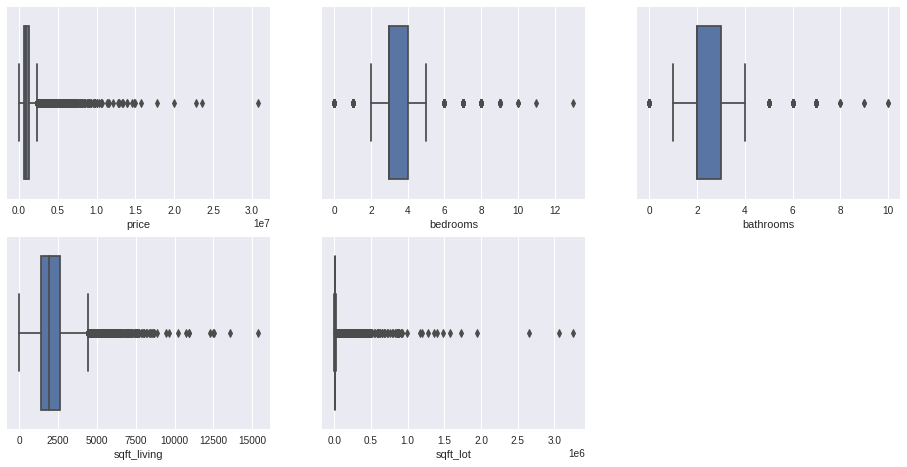

In [62]:
# boxplots on certain features that contain a great deal of outliers

plt.figure(figsize=(16,12))
plt.subplot(331)
sns.boxplot(df.price)
plt.subplot(332)
sns.boxplot(df.bedrooms)
plt.subplot(333)
sns.boxplot(df.bathrooms.astype('int'))
plt.subplot(334)
sns.boxplot(df.sqft_living)
plt.subplot(335)
sns.boxplot(df.sqft_lot);

In [63]:
# create a filter that has only the numerical columns of the dataset
pred_cols = [x for x in df.columns if x not in ['selldate','price','waterfront','greenbelt','nuisance','view','condition','grade','heat_source','sewer_system','address','zipcode']]
pred_cols

['date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sale_yr',
 'yr_old']

In [64]:
pred_cols = ['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'sale_yr',
 'yr_old',
 'zipcode']  

In [65]:
Filtered_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,sale_yr,yr_old,zipcode
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.355910,2021,71,98133
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.290200,2021,11,98118
5,7/20/2021,625000.0,2,1.0,1190,5688,1.0,NO,NO,YES,...,300,0,1948,0,"1602 North 185th Street, Shoreline, Washington...",47.763470,-122.340155,2021,73,98133
8,3/17/2022,780000.0,4,2.5,2340,8125,2.0,NO,NO,NO,...,440,70,1989,0,"2721 Southwest 343rd Place, Federal Way, Washi...",47.293770,-122.369320,2022,33,98023
10,6/1/2022,1025000.0,3,1.5,2570,6379,1.5,NO,NO,YES,...,0,250,1912,0,"3408 Beacon Avenue South, Seattle, Washington ...",47.572760,-122.308200,2022,110,98144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30145,12/27/2021,705000.0,3,2.5,2260,50965,2.0,NO,NO,NO,...,480,200,1998,0,"46533 Southeast 156th Place, North Bend, Washi...",47.457410,-121.719630,2021,23,98045
30147,2/28/2022,665000.0,3,2.5,2100,7210,2.0,NO,NO,NO,...,440,40,1979,0,"5218 South 302nd Place, Auburn, Washington 980...",47.331160,-122.268565,2022,43,98001
30149,10/7/2021,719000.0,3,2.5,1270,1141,2.0,NO,NO,NO,...,200,60,2007,0,"8359 11th Avenue Northwest, Seattle, Washingto...",47.690440,-122.370620,2021,14,98117
30150,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.329400,2021,100,98103


In [66]:
# apply the filter we created to our dataset, assign the model features to 'preds' and assign price to 'target'.
preds = Filtered_df[pred_cols]
target = Filtered_df.price
preds = pd.get_dummies(preds, columns=['zipcode'], drop_first=True)

In [67]:
# create baseline model predictor df and target
y= target
X= preds

model = sm.OLS(y, sm.add_constant(X))
results= model.fit()

In [68]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     483.9
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:27:44   Log-Likelihood:            -2.5349e+05
No. Observations:               17570   AIC:                         5.071e+05
Df Residuals:                   17528   BIC:                         5.074e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.675e+08   1.42e+07    -18.821      0.000   -2.95e+08    -2.4e+08
bedrooms      -6.881e+04   4872.019    -14.123      0.000   -7.84e+04   -5.93e+04
bathrooms      5.768e+04   7096.661      8.127      0.000    4.38e+04    7.16e+04
sqft_living     223.2195     16.628     13.424      0.000     190.626     255.813
sqft_lot          0.6769      0.060     11.205      0.000       0.558       0.795
floors        -6.176e+04   9722.290     -6.353      0.000   -8.08e+04   -4.27e+04
sqft_above      183.0324     16.859     10.856      0.000     149.986     216.078
sqft_basement    38.5500     12.662      3.045      0.002      13.732      63.368
sqft_garage      72.1712     17.928      4.026      0.000      37.030     107.312
sqft_patio      202.9465     16.617     12.213      0.000     170.375     235.518
yr_built      -1854.8044    277.819     -6.676      0.000   -2399.358   -1310.251
sale_yr        1.342e+05   7036.368     19.068      0.000     1.2e+05    1.48e+05
yr_old        -1139.6758    277.625     -4.105      0.000   -1683.849    -595.503
zipcode_98003  3.316e+04   2.78e+04      1.191      0.234   -2.14e+04    8.77e+04
zipcode_98006  9.378e+05   2.68e+04     34.968      0.000    8.85e+05     9.9e+05
zipcode_98022 -1.027e+04   2.78e+04     -0.370      0.712   -6.47e+04    4.42e+04
zipcode_98023 -1.504e+04   2.47e+04     -0.609      0.543   -6.35e+04    3.34e+04
zipcode_98031  4.687e+04   2.64e+04      1.774      0.076   -4929.354    9.87e+04
zipcode_98033  1.213e+06   2.56e+04     47.337      0.000    1.16e+06    1.26e+06
zipcode_98034  6.546e+05   2.48e+04     26.435      0.000    6.06e+05    7.03e+05
zipcode_98038  9.052e+04   2.36e+04      3.834      0.000    4.42e+04    1.37e+05
zipcode_98042  2442.6679   2.29e+04      0.107      0.915   -4.24e+04    4.73e+04
zipcode_98045  2.466e+05   2.75e+04      8.983      0.000    1.93e+05       3e+05
zipcode_98052  8.075e+05    2.6e+04     31.044      0.000    7.57e+05    8.59e+05
zipcode_98056  3.547e+05   2.66e+04     13.347      0.000    3.03e+05    4.07e+05
zipcode_98058  1.048e+05   2.48e+04      4.232      0.000    5.63e+04    1.53e+05
zipcode_98059  2.945e+05   2.58e+04     11.417      0.000    2.44e+05    3.45e+05
zipcode_98092 -4.479e+04   2.56e+04     -1.751      0.080   -9.49e+04    5335.920
zipcode_98103  6.227e+05   2.56e+04     24.317      0.000    5.73e+05    6.73e+05
zipcode_98106  2.679e+05   2.68e+04      9.986      0.000    2.15e+05    3.21e+05
zipcode_98107  6.258e+05   2.88e+04     21.747      0.000    5.69e+05    6.82e+05
zipcode_98115  6.402e+05   2.52e+04     25.446      0.000    5.91e+05     6.9e+05
zipcode_98117  6.002e+05   2.55e+04     23.561      0.000     5.5e+05     6.5e+05
zipcode_98118  3.675e+05   2.63e+04     13.959      0.000    3.16e+05    4.19e+05
zipcode_98122  7.218e+05   2.94e+04     24.585   

Note:the r^2 value which gives the accuracy of the model. its at 1146.96. Cleaning the data, feature engineering and including the dummified categorical variables should improve the r2.

## Model Itiration

In [69]:
# getting rid of those outliers to drive our linear regression

Filtered_df2 = Filtered_df[Filtered_df.price < 4000000]
Filtered_df = Filtered_df[Filtered_df.bedrooms < 5]
Filtered_df = Filtered_df[Filtered_df.bathrooms < 4]
Filtered_df = Filtered_df[Filtered_df.sqft_living < 8000]
Filtered_df = Filtered_df[Filtered_df.sqft_lot < 500000]

In [70]:
# creating copies of the dataframe which will be used in the trial linear regressions

trial_df1 = df.copy()
trial_df2 = df.copy()
trial_df3 = df.copy()

In [71]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
greenbelt         object
nuisance          object
view              object
condition         object
grade             object
heat_source       object
sewer_system      object
sqft_above         int64
sqft_basement      int64
sqft_garage        int64
sqft_patio         int64
yr_built           int64
yr_renovated       int64
address           object
lat              float64
long             float64
sale_yr            int64
yr_old             int64
zipcode           object
dtype: object

In [72]:
# Take a look at the value_counts for our categorical variables. Consider how some of the entries might be reformatted. 
# for example, condition can be altered to take on values of above average, average and below average...
df[['waterfront','greenbelt','nuisance','view','condition','grade']].value_counts()

waterfront  greenbelt  nuisance  view     condition  grade        
NO          NO         NO        NONE     Average    8 Good           4863
                                                     7 Average        4448
                                          Good       7 Average        2931
                                          Average    9 Better         2083
                                          Good       8 Good           1447
                                                                      ... 
                       YES       AVERAGE  Poor       7 Average           1
                                                     6 Low Average       1
YES         NO         NO        AVERAGE  Very Good  9 Better            1
NO          NO         YES       AVERAGE  Poor       5 Fair              1
YES         YES        NO        AVERAGE  Good       12 Luxury           1
Length: 470, dtype: int64

In [73]:
#use pd.get_dummies to dummify categorical variables
cat_columns = ['waterfront','greenbelt','nuisance','view','condition','grade','heat_source','sewer_system']
dummy_df = pd.get_dummies(data=df, columns=cat_columns, drop_first=True)

In [74]:
dummy_df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'address', 'lat', 'long', 'sale_yr',
       'yr_old', 'zipcode', 'waterfront_YES', 'greenbelt_YES', 'nuisance_YES',
       'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NONE',
       'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'heat_source_Electricity/Solar',
       'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
       'heat_source_Oil/Solar', 'heat_source_Other',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED'],
      dtype='object')

## Baseline  Model

### Model Trial 1

In [75]:
# dealing with all the categorical features from the dataset

trial_df1.grade = trial_df1.grade.astype('category')
trial_df1.zipcode = trial_df1.zipcode.astype('category')

In [76]:
trial_df1.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address',
       'lat', 'long', 'sale_yr', 'yr_old', 'zipcode'],
      dtype='object')

In [77]:
# making dummies for all the categorical features 
grade = pd.get_dummies(trial_df1.grade, prefix='grade', drop_first=True)
zipcode = pd.get_dummies(trial_df1.grade, prefix='zipcode', drop_first=True)

In [78]:
# adding dummies to the dataset and removing the original features 

trial_df1 = trial_df1.join([grade, zipcode])
trial_df1.drop(['grade', 'zipcode'], axis=1, inplace=True)

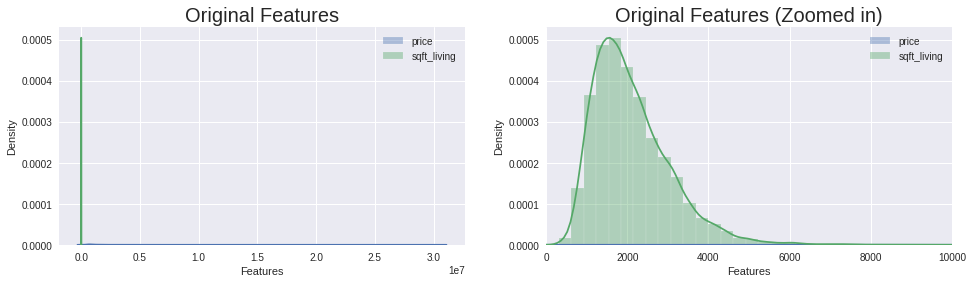

In [79]:
# displots on the continuous features from the dataset

plt.figure(figsize=(16,4))
plt.subplot(121)
sns.distplot(trial_df2.price, label='price')
sns.distplot(trial_df2.sqft_living, label='sqft_living')
plt.title('Original Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()

plt.subplot(122)
sns.distplot(trial_df2.price, label='price')
sns.distplot(trial_df2.sqft_living, label='sqft_living')
plt.title('Original Features (Zoomed in)', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.xlim(0, 10000)
plt.legend()
plt.show()

In [80]:
trial_df1['price_1'] = ( trial_df1['price'] - trial_df1['price'].min() ) / (  trial_df1['price'].max() - trial_df1['price'].min() )
trial_df1['sqft_living_1'] = ( trial_df1['sqft_living'] - trial_df1['sqft_living'].min() ) / (trial_df1['sqft_living'].max() - trial_df1['sqft_living'].min() )

In [81]:
trial_df1

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,zipcode_2 Substandard,zipcode_3 Poor,zipcode_4 Low,zipcode_5 Fair,zipcode_6 Low Average,zipcode_7 Average,zipcode_8 Good,zipcode_9 Better,price_1,sqft_living_1
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,0,0,0,0,1,0,0,0.021080,0.076643
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,0,0,0,0,0,1,0,0,0.029055,0.180178
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,0,0,0,0,0,1,0,0,0.009232,0.187341
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,0,0,0,0,0,0,0,1,0.024335,0.140457
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,0,0,0,0,0,1,0,0,0.018395,0.072736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,0,0,0,0,0,0,1,0,0.049724,0.124178
30151,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,0,0,0,0,0,1,0,0,0.041847,0.131341
30152,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,0,0,0,0,0,1,0,0,0.025149,0.105294
30153,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,...,0,0,0,0,0,0,1,0,0.024335,0.167155


<Figure size 756x432 with 0 Axes>

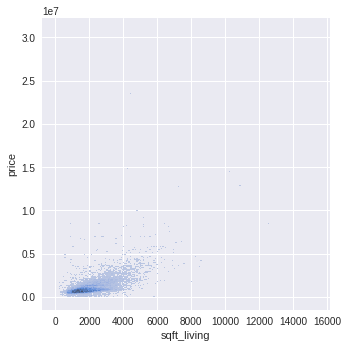

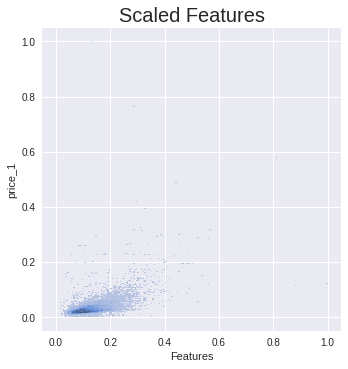

In [82]:
# performing min-max scaling on continuous features

plt.figure(figsize=(10.5,6))
sns.displot(data=trial_df1, x='sqft_living', y='price', kind='hist')
sns.displot(data=trial_df1, x='sqft_living_1', y='price_1', kind='hist')

plt.title('Scaled Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.show();

 Note: Correlation between square footage of living space and price of the home is fairly high compared to the other features. It is clear that larger homes mandate higher asking prices. Selling homes on the larger-end of the spectrum are guaranteed to generate the most revenue.

### Model Trial 2

In [83]:
# dealing with all the categorical features from the dataset
#bathroom,grade, zipcode

trial_df2.bathrooms = trial_df2.bathrooms.astype('int').astype('category')
trial_df2.grade = trial_df2.grade.astype('category')
trial_df2.zipcode = trial_df2.zipcode.astype('category')

In [84]:
# making dummies for all the categorical features 

bathrooms = pd.get_dummies(trial_df2.bathrooms, prefix='bathrooms', drop_first=True)
grade = pd.get_dummies(trial_df2.grade, prefix='grade', drop_first=True)
zipcode = pd.get_dummies(trial_df2.zipcode, prefix='zipcode', drop_first=True)

In [85]:
# adding dummies to the dataset and removing the original features 

trial_df2 = trial_df2.join([bathrooms, grade, zipcode])
trial_df2.drop(['bathrooms', 'grade', 'zipcode'], axis=1, inplace=True)

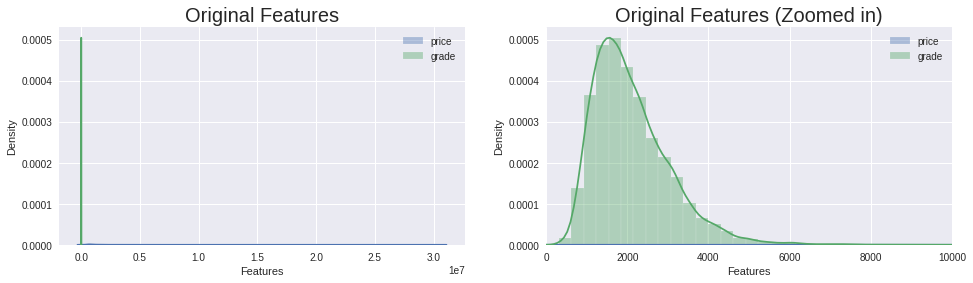

In [86]:
# displots on the continuous features from the dataset

plt.figure(figsize=(16,4))
plt.subplot(121)
sns.distplot(trial_df3.price, label='price')
sns.distplot(trial_df3.sqft_living, label='grade')
plt.title('Original Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()

plt.subplot(122)
sns.distplot(trial_df2.price, label='price')
sns.distplot(trial_df2.sqft_living, label='grade')
plt.title('Original Features (Zoomed in)', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.xlim(0, 10000)
plt.legend()
plt.show()

 Note: It is very influential in the price of the home. In general, as the grade increases, the price increases as well. This highlights the positive linear correlation between the two.
 
 Sidenote: The grade distribution follows a normal curve, which suggests that they are being issued in a forthright and diligent manner. If interested it would be engaging to see what goes into the grading component of the homes. But that's a project for another time.

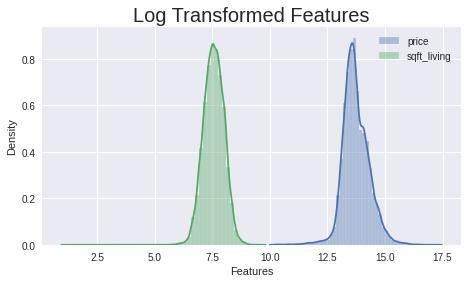

In [87]:
# logarithmic transformation on the continuous features price versus sqft_living

price = np.log(trial_df2.price)
sqft_living = np.log(trial_df2.sqft_living)

plt.figure(figsize=(7.5,4))
sns.distplot(price, label='price')
sns.distplot(sqft_living, label='sqft_living')

plt.title('Log Transformed Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()
plt.show()

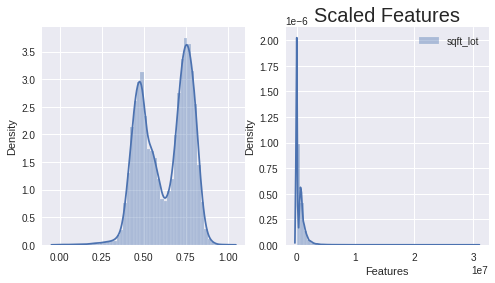

In [88]:
# performing min-max scaling on continuous features price versus sqft_lot

trial_df2['price_2'] = ( price - min(price) ) / ( max(price) - min(price) )
trial_df2['sqft_living_2'] = ( sqft_living - min(sqft_living) ) / ( max(sqft_living) - min(sqft_living) )

test = trial_df2[['sqft_living_2', 'price_2']] #Mini dataframe
test_1 = trial_df2[['sqft_lot','price']]

fig, (ax1,ax2) = plt.subplots(ncols=2 , figsize=(8,4))
sns.distplot(test, label='sqft_living', ax=ax1)
sns.distplot(test_1, label='sqft_lot', ax=ax2)
#sns.displot(trial_df3.sqft_lot, trial_df3.price, label='sqft_lot')

plt.title('Scaled Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()
plt.show()

### Final Model

In [89]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,sale_yr,yr_old,zipcode
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,2022,53,98055
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,2021,71,98133
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,2021,65,98178
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,2021,11,98118
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,2021,9,98027


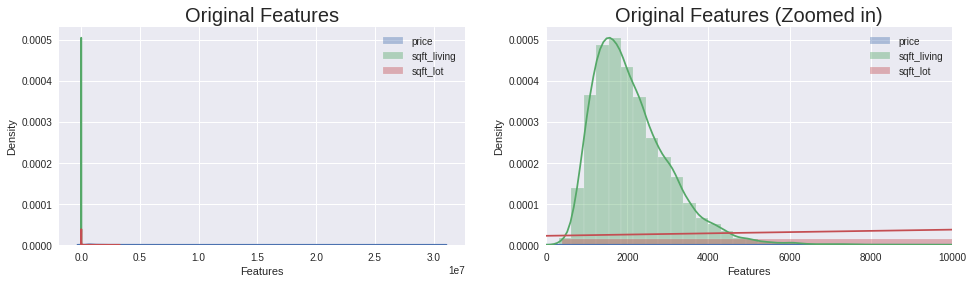

In [90]:
# displots on the continuous features from the dataset
#sqft_living, sqft_lot and price

plt.figure(figsize=(16,4))
plt.subplot(121)
sns.distplot(trial_df1.price, label='price')
sns.distplot(trial_df1.sqft_living, label='sqft_living')
sns.distplot(trial_df1.sqft_lot, label='sqft_lot')
plt.title('Original Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()

plt.subplot(122)
sns.distplot(trial_df1.price, label='price')
sns.distplot(trial_df1.sqft_living, label='sqft_living')
sns.distplot(trial_df1.sqft_lot, label='sqft_lot')
plt.title('Original Features (Zoomed in)', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.xlim(0, 10000)
plt.legend()
plt.show()

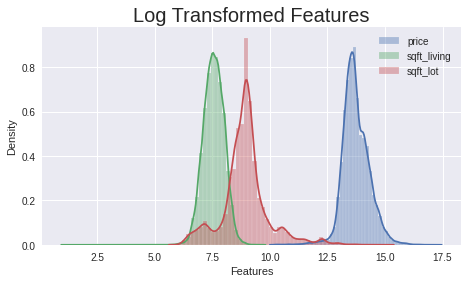

In [91]:
# logarithmic transformation on the continuous features 

price = np.log(trial_df1.price)
sqft_living = np.log(trial_df1.sqft_living)
sqft_lot = np.log(trial_df1.sqft_lot)

plt.figure(figsize=(7.5,4))
sns.distplot(price, label='price')
sns.distplot(sqft_living, label='sqft_living')
sns.distplot(sqft_lot, label='sqft_lot')

plt.title('Log Transformed Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()
plt.show()

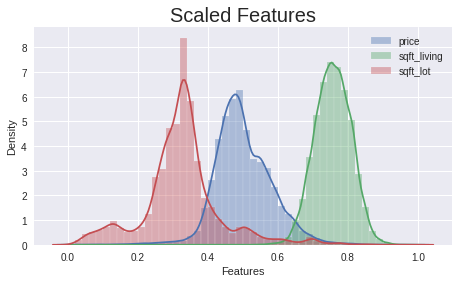

In [92]:
# performing min-max scaling on continuous features 

trial_df1['price'] = ( price - min(price) ) / ( max(price) - min(price) )
trial_df1['sqft_living'] = ( sqft_living - min(sqft_living) ) / ( max(sqft_living) - min(sqft_living) )
trial_df1['sqft_lot'] = ( sqft_lot - min(sqft_lot) ) / ( max(sqft_lot) - min(sqft_lot) )

plt.figure(figsize=(7.5,4))
sns.distplot(trial_df1.price, label='price')
sns.distplot(trial_df1.sqft_living, label='sqft_living')
sns.distplot(trial_df1.sqft_lot, label='sqft_lot')
plt.title('Scaled Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()
plt.show()

In [93]:
# create a filter that has only the numerical columns of the dataset
pred_cols = [x for x in df.columns if x not in ['selldate','price','waterfront','greenbelt','nuisance','view','condition','grade','heat_source','sewer_system','address','zipcode']]
pred_cols

['date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sale_yr',
 'yr_old']

In [94]:
pred_cols = ['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'sale_yr',
 'yr_old']    

In [95]:
Filtered_df2['Mean_sqft_living'] = Filtered_df2['sqft_living'] - Filtered_df2['sqft_living'].mean() 
Filtered_df2['Mean_sqft_lot'] = Filtered_df2['sqft_lot'] - Filtered_df2['sqft_lot'].mean()
Filtered_df2['Mean_sqft_above'] = Filtered_df2['sqft_above'] - Filtered_df2['sqft_above'].mean()
Filtered_df2['Mean_sqft_basement'] = Filtered_df2 ['sqft_basement'] - Filtered_df2['sqft_basement'].mean()


In [96]:
pred_cols_test =  ['bedrooms',
 'bathrooms',
 'Mean_sqft_living',
 'Mean_sqft_lot',
 'floors',
 'Mean_sqft_above',
 'Mean_sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'sale_yr',
 'yr_old',
 'zipcode']

In [97]:
Filtered_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17498 entries, 1 to 30152
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                17498 non-null  object 
 1   price               17498 non-null  float64
 2   bedrooms            17498 non-null  int64  
 3   bathrooms           17498 non-null  float64
 4   sqft_living         17498 non-null  int64  
 5   sqft_lot            17498 non-null  int64  
 6   floors              17498 non-null  float64
 7   waterfront          17498 non-null  object 
 8   greenbelt           17498 non-null  object 
 9   nuisance            17498 non-null  object 
 10  view                17498 non-null  object 
 11  condition           17498 non-null  object 
 12  grade               17498 non-null  object 
 13  heat_source         17489 non-null  object 
 14  sewer_system        17490 non-null  object 
 15  sqft_above          17498 non-null  int64  
 16  sqft

In [98]:
# apply the filter we created to our dataset, assign the model features to 'preds' and assign price to 'target'.
preds2 = Filtered_df2[pred_cols_test]
target2 = Filtered_df2.price
preds2 = pd.get_dummies(preds2, columns=['zipcode'], drop_first=True)

In [99]:
# create baseline model predictor df and target
y2= target2
X2= preds2

model2 = sm.OLS(y2, sm.add_constant(X2))
results2 = model2.fit()

In [100]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     942.3
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:27:54   Log-Likelihood:            -2.4500e+05
No. Observations:               17498   AIC:                         4.901e+05
Df Residuals:                   17456   BIC:                         4.904e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.651e+08   9.31e+06    -28.479      0.000   -2.83e+08   -2.47e+08
bedrooms            -3.76e+04   3208.410    -11.720      0.000   -4.39e+04   -3.13e+04
bathrooms           4.955e+04   4654.851     10.645      0.000    4.04e+04    5.87e+04
Mean_sqft_living     229.0350     10.958     20.900      0.000     207.555     250.515
Mean_sqft_lot          0.6347      0.040     16.058      0.000       0.557       0.712
floors             -5.328e+04   6375.611     -8.356      0.000   -6.58e+04   -4.08e+04
Mean_sqft_above      133.5156     11.097     12.032      0.000     111.765     155.267
Mean_sqft_basement     7.3212      8.325      0.879      0.379      -8.997      23.639
sqft_garage           79.4208     11.800      6.731      0.000      56.292     102.550
sqft_patio           128.2852     10.957     11.708      0.000     106.808     149.763
yr_built           -1864.3002    182.179    -10.233      0.000   -2221.389   -1507.211
sale_yr             1.333e+05   4607.518     28.933      0.000    1.24e+05    1.42e+05
yr_old             -1262.6780    181.967     -6.939      0.000   -1619.352    -906.004
zipcode_98003       3579.3787   1.82e+04      0.196      0.844   -3.21e+04    3.93e+04
zipcode_98006       8.907e+05   1.76e+04     50.511      0.000    8.56e+05    9.25e+05
zipcode_98022       4072.6313   1.82e+04      0.224      0.823   -3.15e+04    3.97e+04
zipcode_98023      -1.106e+04   1.61e+04     -0.685      0.493   -4.27e+04    2.06e+04
zipcode_98031       4.293e+04   1.73e+04      2.486      0.013    9084.274    7.68e+04
zipcode_98033       1.142e+06   1.69e+04     67.580      0.000    1.11e+06    1.18e+06
zipcode_98034       6.081e+05   1.62e+04     37.463      0.000    5.76e+05     6.4e+05
zipcode_98038       1.015e+05   1.54e+04      6.576      0.000    7.12e+04    1.32e+05
zipcode_98042       4471.8438   1.49e+04      0.299      0.765   -2.48e+04    3.38e+04
zipcode_98045       2.669e+05   1.79e+04     14.876      0.000    2.32e+05    3.02e+05
zipcode_98052       8.084e+05    1.7e+04     47.490      0.000    7.75e+05    8.42e+05
zipcode_98056       3.176e+05   1.74e+04     18.251      0.000    2.84e+05    3.52e+05
zipcode_98058       1.074e+05   1.62e+04      6.639      0.000    7.57e+04    1.39e+05
zipcode_98059       2.805e+05   1.69e+04     16.629      0.000    2.47e+05    3.14e+05
zipcode_98092      -3.048e+04   1.67e+04     -1.824      0.068   -6.32e+04    2281.534
zipcode_98103       6.216e+05   1.67e+04     37.120      0.000    5.89e+05    6.54e+05
zipcode_98106       2.604e+05   1.75e+04     14.845      0.000    2.26e+05    2.95e+05
zipcode_98107       6.203e+05   1.88e+04     32.945      0.000    5.83e+05    6.57e+05
zipcode_98115       6.388e+05   1.65e+04     38.814      0.000    6.07e+05    6.71e+05
zipcode_98117       6.029e+05   1.67e+

Note the r2 value which gives the accuracy of the model. its at 14.060, therefor there is an increase of r^2 score at 0.158.

## Regression Results

After building the multiple linear regression, I  arrived at in  increase of the variance of the price, for the first model at r^2 score of .531 and second model at r^2 score of 0.689 , after performing the final model it validates that the model accuracy of an increase of r^2  score of .0158. In which the model accuracy increases to 69%. When using signigicant features using those p-value below 0.05 -  Mean_sqft_basement = 0.379, zipcode_98003 = 0.844 , zipcode_98022 = .0823 , zipcode_98023 = 0.493 , zipcode_98031= 0.013 ,zipcode_98042=0.0765 ,  zipcode_98092	= 0.068
 
In using all the data of columns choosen for final model , the regression coefficient matrix for bedrooms = -3.76e+04 indicates that the value decreases than the  bathrooms = 4.955e+04 tends to increase , The coefficient values that signifies how much the mean of  following , Mean_sqft_living = 229.0350 , Mean_sqft_lot = 0.6347, Mean_sqft_above = 133.5156 , Mean_sqft_basement	= 7.3212, it changes the model constant. Coefficients tell you about these changes and p-values tell you if these coefficients are significantly different from zero.



## Conclusion

After having done for the First Model  linear regression without extracting any of the features it is evident that the model was in less status. The accuracy was on the below and it was nowhere close to predicting the house price at an accurate level or precision. After controlling for the features in the final model  and only allowing for sqft_living, sqft_lot grade, and zipcode (which was one feature I never considered using until it came up as a significant feature in the final model ), the r^2 score  from .0531 in first Model  to .0689 in the final model and the model accuracy was up to 69%. 


I can conclude from looking at all this that the final model are more significant (sqft_living, sqft_above, zipcode) to best predict house prices. The model without controlling for significant features did slightly better than the one that did, but the results we obtained don't seem to be that different from one another. Both models did extremely well. 

## Recommendations

1.Make sure to focus a great deal on the living space (sqft) of the house when taking price into account. These two are very much positively correlated. This means that as living space square footage increases, so does the price. If there is one sole feature that will drive the price of a particular house up, it would have to be the sqare footage.

2.Location, location, and location! Pay particular attention to the locality of the house. Particular zipcodes are associated with quite expensive homes and vice-versa. Although we didn't dive much into it in this project, it would be interesting to see the what the ratings of the schools are in these areas and the median salaries for people living in these regions.

3.The grade of the home had a significant impact on the price of the homes as well. I'm not too sure what goes into the grading system that King County uses. It would be interesting to see what the variables are that are taken into account when grading a particular home. The grading system seems to be fairly distributed in terms of homes per particular grade.

4.If there was a need to include a fourth feature when looking at house prices it would have to be bathrooms. I found it quite odd, to say the least, that bathrooms drove the price up more than did bedrooms. I would've assumed it would be the other way around, but after performing correlation analysis, it proved to be bathrooms first and bedrooms second.

## Level Up: Project Enhancements

After completing the minimum project requirements, you could consider the following enhancements if you have time:

* Consider applying a linear or non-linear transformation to your features and/or target
* Investigate the linear regression assumptions for your final model
* Identify and remove outliers, then redo the analysis
* Compile the data cleaning code into a function

NOTE: I was not able to have more time on this^^, but it's absoltely a  good project in the future.